# Red Neuronal Densa TensorFlow

## Predicción de Visibilidad de Weather History Dataset

### Ángel Isaac Gómez Canales

## Paso 1. Importar paquetería necesaria 📦

In [132]:
# Paqueteria basica
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Tensorflow y keras
import tensorflow as tf
from tensorflow import keras
from keras import backend as K

# Funcionalidades basicas de sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

## Paso 2. Cargar los datos 💾

In [133]:
data = pd.read_csv("../Datasets/weatherHistory.csv")  # Cambiar la ruta a la adecuada

## Paso 3. Inspeccionar los datos 🔎

A continuacion se muestran los primeros 5 datos del datset para observar el formato que tienen los datos

In [134]:
data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [135]:
data.shape

(96453, 12)

Información del Dataset para conocer sus columnas y  ver si tiene valores nulos que se deban eliminar

In [136]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [137]:
data.isna().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

De aquí vemos que la columna 'PrecipType' cuenta con 517 valores nan, los cuales será necesario tratar para poder pasar los datos al modelo.

In [138]:
data.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


Se observa que hay columnas que toman valores en el orden de $10^{0}$, mientras que otras toman valores en el rango de $10^{3}$, por lo que será necesario escalar los datos.

Ahora veremos que información contienen las columnas no numéricas

In [139]:
data.select_dtypes(include="object")

,Formatted Date,Summary,Precip Type,Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,Partly cloudy throughout the day.
...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,Partly cloudy starting in the morning.


In [140]:
data["Summary"].value_counts()

Summary
Partly Cloudy                          31733
Mostly Cloudy                          28094
Overcast                               16597
Clear                                  10890
Foggy                                   7148
Breezy and Overcast                      528
Breezy and Mostly Cloudy                 516
Breezy and Partly Cloudy                 386
Dry and Partly Cloudy                     86
Windy and Partly Cloudy                   67
Light Rain                                63
Breezy                                    54
Windy and Overcast                        45
Humid and Mostly Cloudy                   40
Drizzle                                   39
Breezy and Foggy                          35
Windy and Mostly Cloudy                   35
Dry                                       34
Humid and Partly Cloudy                   17
Dry and Mostly Cloudy                     14
Rain                                      10
Windy                                      8
Hu

In [141]:
data['Precip Type'].value_counts()

Precip Type
rain    85224
snow    10712
Name: count, dtype: int64

In [142]:
data["Daily Summary"].value_counts()

Daily Summary
Mostly cloudy throughout the day.                                                                       20085
Partly cloudy throughout the day.                                                                        9981
Partly cloudy until night.                                                                               6169
Partly cloudy starting in the morning.                                                                   5184
Foggy in the morning.                                                                                    4201
                                                                                                        ...  
Breezy starting overnight continuing until morning and foggy overnight.                                    24
Mostly cloudy throughout the day and breezy starting overnight continuing until afternoon.                 24
Partly cloudy starting in the morning and breezy starting in the afternoon continuing until evening.      

Estas columnas las codificaremos mas adelante

## Paso 3. Preprocesamiento de los datos 🛠️

Primero eliminaremos columnas que no aporten informacion al modelo, en este caso elimnaremos las columnas de fecha y el resumen diario, ya que esta información ya está contenida en la columna de resumen, por lo que podría ser redundante

In [143]:
data.drop(columns=["Formatted Date", "Daily Summary"], inplace=True)

Ahora eliminamos las filas que tengan valores nan, en este caso podemos "darnos el lujo" de eliminar las columnas nan ya que tenemos una gran cantidad de datos.

In [144]:
data.dropna(axis=0, inplace=True)

Ahora codificamos las variables no numericas

In [145]:
# Sustituir las columnas por la version codificada
for columna in data.select_dtypes(include="object").columns:
    LE = LabelEncoder()
    data[columna] = LE.fit_transform(data[columna])
    print(f"Codificada columna: {columna}")

Codificada columna: Summary
Codificada columna: Precip Type


In [146]:
data.tail()

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
96448,19,0,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36
96449,19,0,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16
96450,19,0,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66
96451,19,0,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95
96452,19,0,20.438889,20.438889,0.61,5.8765,39.0,15.5204,0.0,1016.16


A continuación, separamos las variables de entrada de las salidas

In [147]:
X = data.drop(columns="Visibility (km)")
Y = data["Visibility (km)"].to_numpy()

El siguiente paso es escalar los datos para que tengan rangos similares y poder entrenar la red de mejor manera

In [148]:
X = StandardScaler().fit_transform(X)

Finalmente, particionamos los datos con el 70% para entrenamiento, 15% para validacion el 15% para prueba

In [149]:
X_train, X_res, Y_train, Y_res = train_test_split(X, Y, test_size=0.3)  # Obtener set de entrenamiento y test/val
X_test, X_val, Y_test, Y_val = train_test_split(X_res, Y_res, test_size=0.5)  # Obtener set de validacion y test

# Paso 4. Diseñar Red Neuronal 👨‍💻

Definimos la funcion para r2score

In [123]:
def r2score(y_true, y_pred):
    SS_res = K.sum(K.square(y_true - y_pred))
    SS_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return 1 - SS_res / (SS_tot + K.epsilon())

In [163]:
model = keras.Sequential()
model.add(keras.layers.Dense(512, activation=tf.keras.layers.LeakyReLU(alpha=0.01), input_shape=[X_train.shape[1]], kernel_regularizer=keras.regularizers.L1L2(0.01)))
model.add(keras.layers.Dense(256, activation=tf.keras.layers.LeakyReLU(alpha=0.01), kernel_regularizer=keras.regularizers.L1L2(0.01)))
model.add(keras.layers.Dense(128, activation=tf.keras.layers.LeakyReLU(alpha=0.01), kernel_regularizer=keras.regularizers.L1L2(0.01)))
model.add(keras.layers.Dense(64, activation=tf.keras.layers.LeakyReLU(alpha=0.01), kernel_regularizer=keras.regularizers.L1L2(0.01)))
model.add(keras.layers.Dense(32, activation=tf.keras.layers.LeakyReLU(alpha=0.01), kernel_regularizer=keras.regularizers.L1L2(0.01)))
model.add(keras.layers.Dense(32, activation=tf.keras.layers.LeakyReLU(alpha=0.01), kernel_regularizer=keras.regularizers.L1L2(0.01)))
model.add(keras.layers.Dense(16, activation=tf.keras.layers.LeakyReLU(alpha=0.01), kernel_regularizer=keras.regularizers.L1L2(0.01)))
model.add(keras.layers.Dense(1, activation="linear"))
model.compile(loss=keras.losses.mean_squared_error, optimizer=keras.optimizers.legacy.Adam(), metrics=[keras.metrics.mean_absolute_error, r2score])

El Dropout hace que se obtengan val r2 mas altos

In [164]:
# Resumen del modelo
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_67 (Dense)            (None, 512)               5120      
                                                                 
 dense_68 (Dense)            (None, 256)               131328    
                                                                 
 dense_69 (Dense)            (None, 128)               32896     
                                                                 
 dense_70 (Dense)            (None, 64)                8256      
                                                                 
 dense_71 (Dense)            (None, 32)                2080      
                                                                 
 dense_72 (Dense)            (None, 32)                1056      
                                                                 
 dense_73 (Dense)            (None, 16)              

## Paso 5. Entrenar la Red Neuronal 🧠💪

In [165]:
history = model.fit(X_train, Y_train, batch_size=32, epochs=100, verbose=1, validation_data=(X_val, Y_val))

Epoch 1/100
2099/2099 [==============================] - 4s 2ms/step - loss: 19.2982 - mean_absolute_error: 2.6086 - r2score: 0.3626 - val_loss: 11.0775 - val_mean_absolute_error: 2.4174 - val_r2score: 0.4580
Epoch 2/100
2099/2099 [==============================] - 3s 2ms/step - loss: 10.8025 - mean_absolute_error: 2.4267 - r2score: 0.4578 - val_loss: 11.0938 - val_mean_absolute_error: 2.3407 - val_r2score: 0.4079
Epoch 3/100
2099/2099 [==============================] - 3s 2ms/step - loss: 10.1805 - mean_absolute_error: 2.4050 - r2score: 0.4669 - val_loss: 9.7920 - val_mean_absolute_error: 2.4217 - val_r2score: 0.4684
Epoch 4/100
2099/2099 [==============================] - 3s 2ms/step - loss: 9.8565 - mean_absolute_error: 2.3948 - r2score: 0.4731 - val_loss: 9.6001 - val_mean_absolute_error: 2.3188 - val_r2score: 0.4709
Epoch 5/100
2099/2099 [==============================] - 3s 2ms/step - loss: 9.6989 - mean_absolute_error: 2.3931 - r2score: 0.4773 - val_loss: 9.3364 - val_mean_absol

2099/2099 [==============================] - 3s 2ms/step - loss: 8.7643 - mean_absolute_error: 2.3472 - r2score: 0.5003 - val_loss: 8.8807 - val_mean_absolute_error: 2.4713 - val_r2score: 0.4758
Epoch 41/100
2099/2099 [==============================] - 3s 2ms/step - loss: 8.7368 - mean_absolute_error: 2.3448 - r2score: 0.5010 - val_loss: 8.6486 - val_mean_absolute_error: 2.3051 - val_r2score: 0.4951
Epoch 42/100
2099/2099 [==============================] - 3s 2ms/step - loss: 8.7473 - mean_absolute_error: 2.3456 - r2score: 0.5008 - val_loss: 8.6240 - val_mean_absolute_error: 2.3550 - val_r2score: 0.4944
Epoch 43/100
2099/2099 [==============================] - 3s 2ms/step - loss: 8.7287 - mean_absolute_error: 2.3462 - r2score: 0.5013 - val_loss: 8.6223 - val_mean_absolute_error: 2.3120 - val_r2score: 0.4945
Epoch 44/100
2099/2099 [==============================] - 3s 2ms/step - loss: 8.7184 - mean_absolute_error: 2.3431 - r2score: 0.5023 - val_loss: 8.6943 - val_mean_absolute_error: 2.

2099/2099 [==============================] - 4s 2ms/step - loss: 8.5678 - mean_absolute_error: 2.3348 - r2score: 0.5055 - val_loss: 8.4505 - val_mean_absolute_error: 2.3271 - val_r2score: 0.4997
Epoch 80/100
2099/2099 [==============================] - 4s 2ms/step - loss: 8.5519 - mean_absolute_error: 2.3337 - r2score: 0.5056 - val_loss: 8.4789 - val_mean_absolute_error: 2.3079 - val_r2score: 0.4975
Epoch 81/100
2099/2099 [==============================] - 3s 2ms/step - loss: 8.5638 - mean_absolute_error: 2.3354 - r2score: 0.5052 - val_loss: 8.5844 - val_mean_absolute_error: 2.2753 - val_r2score: 0.4922
Epoch 82/100
2099/2099 [==============================] - 3s 2ms/step - loss: 8.5631 - mean_absolute_error: 2.3345 - r2score: 0.5071 - val_loss: 8.4812 - val_mean_absolute_error: 2.2801 - val_r2score: 0.4984
Epoch 83/100
2099/2099 [==============================] - 3s 2ms/step - loss: 8.5597 - mean_absolute_error: 2.3355 - r2score: 0.5048 - val_loss: 8.4321 - val_mean_absolute_error: 2.

Graficamos ahora las curvas de aprendizaje para un mejor diagnóstico del aprendizaje

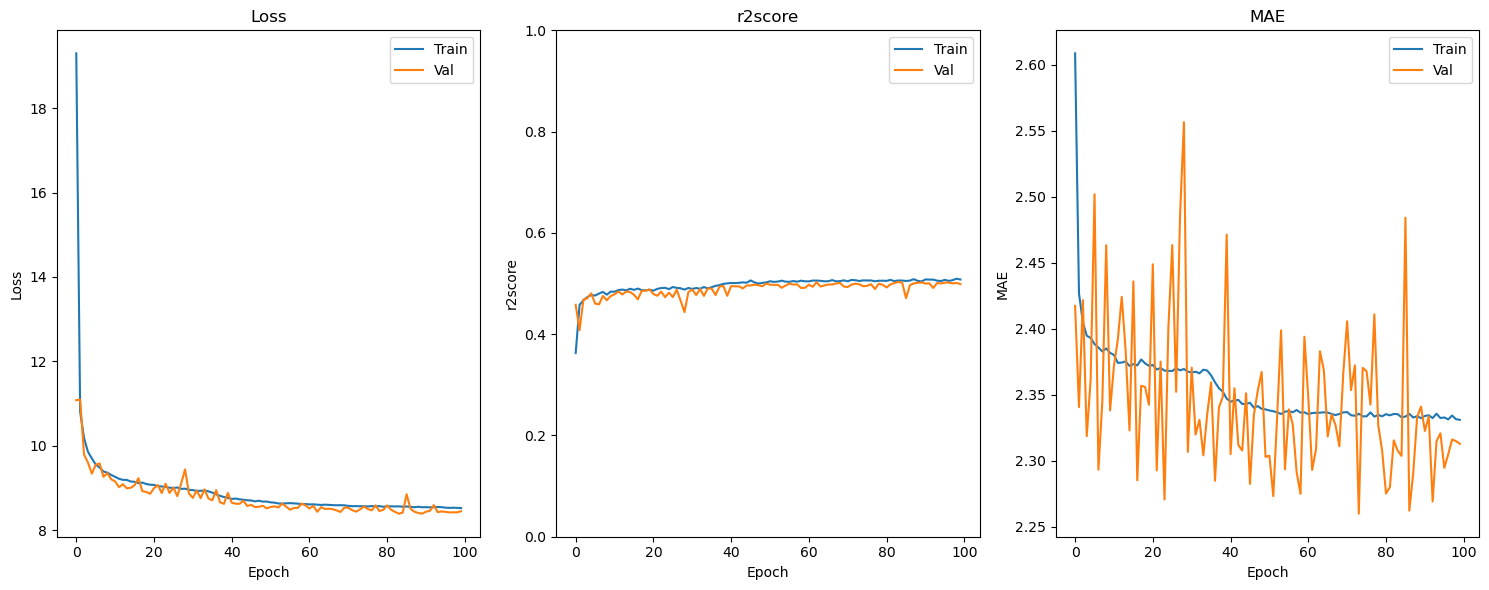

In [166]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
    plt.figure(figsize=(15, 6))
    plt.subplot(131)
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(hist['epoch'], hist['loss'], label="Train")
    plt.plot(hist['epoch'], hist['val_loss'], label = 'Val')
    #plt.yscale('log')
    plt.legend()

    plt.subplot(132)
    plt.title('r2score')
    plt.xlabel('Epoch')
    plt.ylabel('r2score')
    plt.plot(hist['epoch'], hist['r2score'], label="Train")
    plt.plot(hist['epoch'], hist['val_r2score'], label = 'Val')
    plt.ylim([0,1])
    plt.legend()
    
    
    
    plt.subplot(133)
    plt.title('MAE')
    plt.xlabel('Epoch')
    plt.ylabel('MAE')
    plt.plot(hist['epoch'], hist['mean_absolute_error'], label="Train")
    plt.plot(hist['epoch'], hist['val_mean_absolute_error'], label = 'Val')
    plt.legend()
    
    plt.tight_layout()
    plt.show()
     
plot_history(history)

## Paso 6. Evaluar el modelo con el test set

Metricas de desempeño; r2 score, error absoluto medio, raiz cuadrada del error cuadrado medio

In [167]:
Y_pred = model.predict(X_test, verbose=0)
r2 = r2_score(Y_test, Y_pred)
mae = mean_absolute_error(Y_test, Y_pred)
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))

metricas = pd.DataFrame({"r2 score": [r2], "MAE": [mae], "RMSE": [rmse]})
metricas

,r2 score,MAE,RMSE
0,0.534585,2.34702,2.848089
